# Final Work of Machine Learning Discipline

### Tipo de problema
NER - Named Entity Recognition.

Neste tipo de problema um modelo de predição para textos tentará predizer da melhor maneira possível quais são as entidades em um texto. Os problemas de NER surgem devido diversas maneiras de expressar uma determinada coisa e também onde uma coisa pode significar várias outras.
A língua Portuguesa por exemplo possui muitos tempos verbais e maneiras de conjugação de verbos.

Ex: conjugar, conjugado, conjugaria, conjugarei, conjugaríamos, conjugaríeis, conjugaste, conjugou, conjuguemos...

Tente explicar por exemplo para um extrangeiro a diferença entre "bota a calça e calça a bota".

### Problema
O problema a ser resolvido com a resolução deste trabalho é utilizar um dataset com milhares de textos e palavras rotulados e a partir de um modelo de predições de texto realizar o ranqueamento das melhores classificações. 

### Datasets
Será utilizado um dataset amplamente difundido que foi utilizado primariamente na Conference on Computational Natural Language Learning (CoNLL-2003) acessível a partir do seguinte link: https://www.clips.uantwerpen.be/conll2003/ner/

### Divisão do dataset
O primeiro item de cada linha é uma palavra. O segundo é um Part-of-Speech (POS) tag. O terceiro é uma tag de fragmento sintático. A quarta é a tag de entidade nomeada.

As tags de fragmento e os nomes de entidades tem o formato I-TYPE que significa que a palavra está dentro de uma frase do tipo TYPE.

 Uma palavra com a tag O não é parte de uma frase.

### Divisão do dataset - rows
Os arquivos de dados de tarefas compartilhadas CoNLL-2003 contêm quatro colunas separadas por um único espaço.

- O primeiro item de cada linha no dataset é uma palavra.  
- O segundo é um Part-of-Speech (POS) tag. 
- O terceiro é uma tag de fragmento sintático. 
- A quarta é a tag de entidade nomeada.

As tags de fragmento e os nomes de entidades tem o formato I-TYPE que significa que a palavra está dentro de uma frase do tipo TYPE.

 Uma palavra com a tag O não é parte de uma frase.

In [10]:
#U.N.         NNP  I-NP  I-ORG 
#official     NN   I-NP  O 
#Ekeus        NNP  I-NP  I-PER 
#heads        VBZ  I-VP  O 
#for          IN   I-PP  O 
#Baghdad      NNP  I-NP  I-LOC 
#.            .    O     O 

In [11]:
# mostra o que significa cada saída do token
spacy.explain("NNP")

'noun, proper singular'

### Divisão dos arquivos de dados
A divisão dos arquivos do dataset se dão da seguinte forma:
    - Consiste de 3 arquivos por linguagem
    - Um arquivo de treino
    - Dois arquivos de teste, testeA e testeB
    - O primeiro arquivo de teste será usado em produção para encontrar os melhores parametros
    - O segundo arquivo de teste será usado para a avaliação final
    - Os dados estão disponíveis em dois datasets, um em Inglês e também em Alemão. Para o propósito deste trabalho será usado apenas a versão em inglês.
   

### Arquivos
- eng.raw.tar   - 13,930 MB - Conjunto de dados em inglês
- ner.tgz       - 3,374  MB - Contém o software para fazer o build dos dados
- 000README.txt - 8      KB - Instruções para descompactação

Os dados em inflês são uma coleção de artigos de notícias do Reuters Corpus.

### Métricas de Avaliação
A competição utiliza três métricas principais que são:
- Precision
- Recall
- F-Score

Precision é a porcentagem de named entities encontradas pelo sistema de aprendizado que estão corretas.

Recall é a porcentagem de named entities presentes no Corpus que são encontradas pelo sistema.

Uma named entity só está correta se for uma correspondência exata da entidade correspondente no
arquivo de dados.

In [4]:
import spacy
from spacy import displacy

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.pos_, token.dep_)

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

### Separando cada parte do texto como string

In [ ]:
doc2 = nlp(u'You finded the book that I told you, Carla?')

In [ ]:
doc2.text.split()

### Pegando cada token e mostrando

In [ ]:
[token for token in doc2]

### Pegando os tokens como strings

In [ ]:
[token.orth_ for token in doc2]

### Pegando apenas as palavras de um texto

In [ ]:
[token.orth_ for token in doc2 if not token.is_punct]

In [ ]:
[token.orth_ for token in doc2 if token.is_punct]

### Similaridade

In [ ]:
tokens = [token for token in doc2]

In [ ]:
# you | I
tokens[0].similarity(tokens[5])

In [ ]:
# you | book
tokens[0].similarity(tokens[3])

### Análise de classes gramaticais

In [ ]:
[(token.orth_, token.pos_) for token in doc2]

### Fazendo a lematização 
Isso funciona para textos que podem ter diversas conjufações e tempos verbais, assim ele somente pega a raíz da palavra

In [ ]:
[token.lemma_ for token in doc2 if token.pos_ == 'VERB']

In [ ]:
doc2 = nlp(u'knew, know')

In [ ]:
[token.lemma_ for token in doc2 if token.pos_ == 'VERB']

In [ ]:
# verifica se uma palavra é ancestral de outra
doc2 = nlp(u'find finded')
tokens = [token for token in doc2]
tokens[0].is_ancestor(tokens[1])

## Entidades!

In [ ]:
doc = nlp(u'Levi Carneiro one of the best writers in Brazil, was an president of the Brasilian Academy of Letters')

In [ ]:
[(entity, entity.label_) for entity in doc.ents]

In [ ]:
# Exemplo maior
wiki_obama = """Barack Obama is an American politician who served as
the 44th President of the United States from 2009 to 2017. He is the first
African American to have served as president,
as well as the first born outside the contiguous United States."""
nlp_obama = nlp(wiki_obama)
[(entity, entity.label_) for entity in nlp_obama.ents]

### Mostrando informações sobre cada entidade

In [ ]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [ ]:
doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")
spacy.displacy.render(doc, style='ent', jupyter=True)

In [ ]:
#doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")
#spacy.displacy.serve(doc, style='dep', options={'distance' : 140})

### Training data: Examples and their annotations.

### Text: The input text the model should predict a label for.

### Label: The label the model should predict.

### Gradient: Gradient of the loss function calculating the difference between input and expected output.

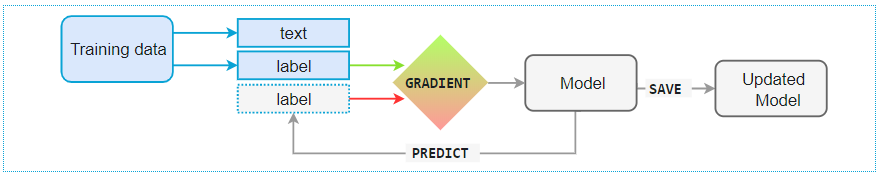

In [2]:
from IPython.display import Image
Image(filename="training model.png")